# Ridge Regression [PART - 1]

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [76]:
data = load_diabetes()

In [77]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [78]:
X = data.data
y = data.target

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 45)

In [80]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2 Score", r2_score(y_pred, y_test))
print("Root Mean Square Error: ", root_mean_squared_error(y_pred, y_test))

R2 Score 0.15992844644314907
Root Mean Square Error:  48.72713760953253


## Ridge Regression from Sklearn Library

`alpha = penalty term`

In [81]:
R = Ridge(alpha = 0.001)

In [82]:
R.fit(X_train,y_train)
y_pred = R.predict(X_test)
print("R2 Score", r2_score(y_pred, y_test))
print("Root Mean Square Error: ", root_mean_squared_error(y_pred, y_test))

R2 Score 0.16064010917326121
Root Mean Square Error:  48.65957177859253


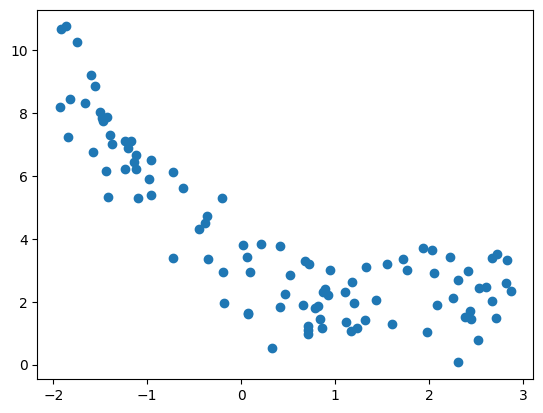

In [83]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = (0.7 * x1 ** 2) - 2 * x1 + 3 + np.random.randn(m, 1)
plt.scatter(x1, x2)
plt.show()

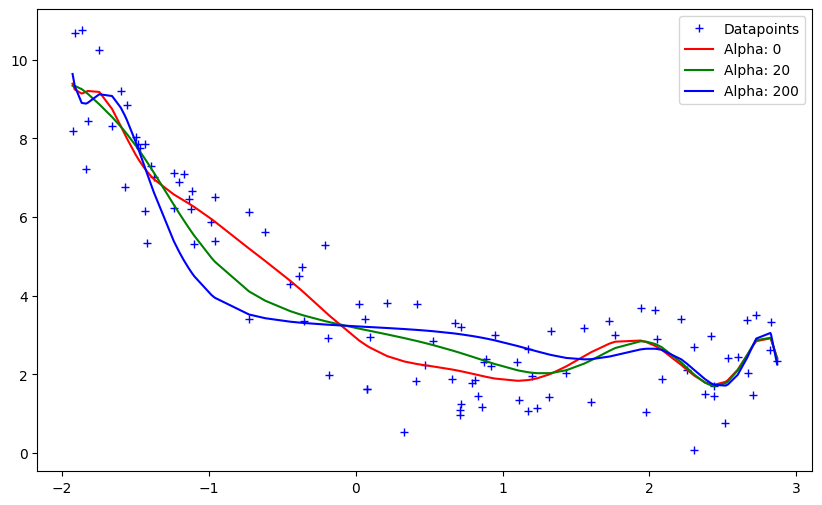

In [84]:
def get_preds_ridge(x1, x2, alpha):
  model = Pipeline([
      ('poly_feats', PolynomialFeatures(degree = 16)),
      ('ridge', Ridge(alpha = alpha))
  ])
  model.fit(x1, x2)
  return model.predict(x1)
alphas = [0, 20, 200]
cs = ['r', 'g', 'b']
plt.figure(figsize = (10,6))
plt.plot(x1, x2, 'b+', label = 'Datapoints')
for alpha, c in zip(alphas, cs):
  preds = get_preds_ridge(x1, x2, alpha)
  plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:,0])], c, label = 'Alpha: {}'.format(alpha))
plt.legend()
plt.show()

# Ridge Regression [PART - 2]
## For 2 Dimensional Data

## Ridge Regression [Slope and Intercepts] - From Scratch

In [85]:
X, y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 20, random_state = 13)

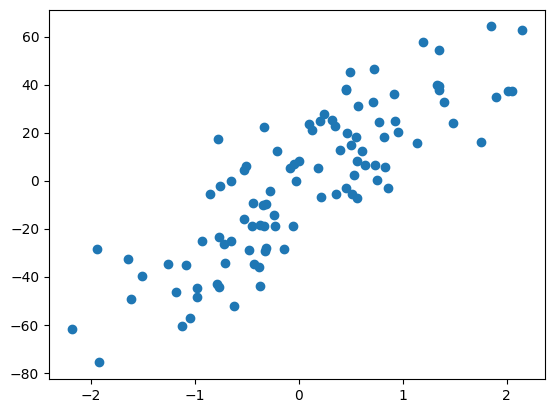

In [86]:
plt.scatter(X, y)

In [87]:
lr = LinearRegression()
lr.fit(X, y)
print("Coefficient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficient:  [27.82809103]
Intercept:  -2.29474455867698


In [88]:
rr = Ridge(alpha = 10)
rr.fit(X, y)
print("Coefficient: ", rr.coef_)
print("Intercept: ", rr.intercept_)

Coefficient:  [24.9546267]
Intercept:  -2.1269130035235735


In [89]:
rr_1 = Ridge(alpha = 100)
rr_1.fit(X, y)
print("Coefficient: ", rr_1.coef_)
print("Intercept: ", rr_1.intercept_)

Coefficient:  [12.93442104]
Intercept:  -1.4248441496033308


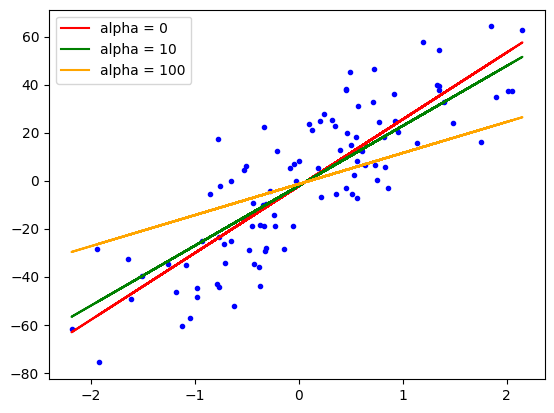

In [90]:
plt.plot(X,y,'b.')
plt.plot(X, lr.predict(X), color = 'red', label = 'alpha = 0')
plt.plot(X, rr.predict(X), color = 'green', label = 'alpha = 10')
plt.plot(X, rr_1.predict(X), color = 'orange', label = 'alpha = 100')
plt.legend()
plt.show()

## Custom Ridge Regression Class

In [91]:
"""
value of m = numerator / denominator
numerator = summation_i_1toN (Y_i - Y_mean) *(X_i - X_mean)
denominator = lambda(penalty term) + summation_i_1toN (X_i - X_mean) ** 2
m = [summation_i_1toN (Y_i - Y_mean) *(X_i - X_mean)]/[lambda(penalty term) + summation_i_1toN (X_i - X_mean) ** 2]

"""
class CustomRidgeRegression:
  def __init__(self, alpha = 0.1):
    self.alpha = alpha
    self.coefficient = None
    self.intercept = None
  def fit(self, X_train, y_train):
    numerator = 0
    denominator = 0
    for i in range(X_train.shape[0]):
      numerator =  numerator + ((y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean()))
      denominator = denominator + (X_train[i] - X_train.mean())**2
    self.coefficient = numerator / (denominator + self.alpha)
    self.intercept = y_train.mean() - (self.coefficient * X_train.mean())
    print("Coefficient: ", self.coefficient)
    print("Intercept: ", self.intercept)
  def predict(self, X_test):
    y_pred = 0
    for i in range(X_test.shape[0]):
      y_pred = y_pred + self.coefficient * X_test[i] + self.intercept[i]
    return y_pred

In [92]:
crr = CustomRidgeRegression(alpha = 10)
print("For alpha = 10: ")
crr.fit(X, y)

print()

crr = CustomRidgeRegression(alpha = 100)
print("For alpha = 100: ")
crr.fit(X, y)

For alpha = 10: 
Coefficient:  [24.9546267]
Intercept:  [-2.126913]

For alpha = 100: 
Coefficient:  [12.93442104]
Intercept:  [-1.42484415]


## For N Dimensional Data

In [93]:
X,y = load_diabetes(return_X_y = True)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [95]:
rreg = Ridge(alpha = 0.1, solver = 'cholesky')
rreg.fit(X_train, y_train)
y_pred = rreg.predict(X_test)
print("R2 Score: ", r2_score(y_pred, y_test))
print("Root Mean Square Error: ", root_mean_squared_error(y_pred, y_test))

R2 Score:  -0.2813489752918308
Root Mean Square Error:  53.801079806407095


In [96]:
print("Intercept: ", rreg.intercept_)
print()
print("Coefficient: ", rreg.coef_)

Intercept:  150.89053425602808

Coefficient:  [  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]


In [97]:
class CustomRidgeRegressionNDimensional:
  def __init__(self, alpha = 0.1):
    self.alpha = alpha
    self.coefficient = None
    self.intercept = None
  def fit(self, X_train, y_train):
    X_train = np.insert(X_train, 0, 1, axis = 1)
    identity_matrix = np.identity(X_train.shape[1])
    penalty_term = self.alpha * identity_matrix
    w = np.linalg.inv(np.dot(X_train.T, X_train) + penalty_term).dot(X_train.T).dot(y_train)
    self.coefficient = w[1:]
    self.intercept = w[0]
    print("Coefficient: ", self.coefficient)
    print("Intercept: ", self.intercept)
  def predict(self, X_test):
    return np.dot(X_test,self.coefficient) + self.intercept

`np.identify(X_train.shape[1]) = No of Rows ka identity matrix`.

In [98]:
reg = CustomRidgeRegressionNDimensional()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print()
print("R2 Score: ", r2_score(y_pred, y_test))
print()
print("Root Mean Square Error: ", root_mean_squared_error(y_pred, y_test))

Coefficient:  [  44.04252774 -241.72019592  452.99153345  332.06044266  -76.32617866
  -68.54884462 -165.01664054  149.93980143  431.59483654   58.54419942]
Intercept:  150.84762720023167

R2 Score:  -0.28155543141188133

Root Mean Square Error:  53.80611155568962


### Exactly getting

The reason of using `[0][0]=0` is that because in our matrix W the first term is basically intercept not slope and we have to multiply Lambda with only slopes.
Thats why first term became zero and lambda is multiplied with only slopes.

In [99]:
class CustomRidgeRegressionNDimensional:
  def __init__(self, alpha = 0.1):
    self.alpha = alpha
    self.coefficient = None
    self.intercept = None
  def fit(self, X_train, y_train):
    X_train = np.insert(X_train, 0, 1, axis = 1)
    identity_matrix = np.identity(X_train.shape[1])
    identity_matrix[0][0] = 0
    penalty_term = self.alpha * identity_matrix
    w = np.linalg.inv(np.dot(X_train.T, X_train) + penalty_term).dot(X_train.T).dot(y_train)
    self.coefficient = w[1:]
    self.intercept = w[0]
    print("Coefficient: ", self.coefficient)
    print("Intercept: ", self.intercept)
  def predict(self, X_test):
    return np.dot(X_test,self.coefficient) + self.intercept

In [100]:
reg = CustomRidgeRegressionNDimensional()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print()
print("R2 Score: ", r2_score(y_pred, y_test))
print()
print("Root Mean Square Error: ", root_mean_squared_error(y_pred, y_test))

Coefficient:  [  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
Intercept:  150.8905342560281

R2 Score:  -0.2813489752918308

Root Mean Square Error:  53.801079806407095


## Gradient Descent using sklearn

In [101]:
X,y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

In [102]:
reg = SGDRegressor(penalty = 'l2', max_iter = 500, eta0 = 0.1, learning_rate = 'constant', alpha = 0.001)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R2 Score: ", r2_score(y_pred, y_test))
print("Root Mean Square Error: ", root_mean_squared_error(y_pred, y_test))
print(" ")
print("Coefficient: ", reg.coef_)
print("Intercept: ", reg.intercept_)

R2 Score:  -0.6631732814492695
Root Mean Square Error:  54.40303737999783
 
Coefficient:  [  51.0549496  -149.94004672  362.67683456  266.45533966   -4.67052388
  -58.87587948 -167.51991316  136.98863675  327.72194941  105.23597594]
Intercept:  [152.4561143]


## Custom Gradient Descent [Ridge Regression]

In [103]:
class CustomRidgeRegressionGradientDescent:
  def __init__(self, epochs, learning_rate, alpha):
    self.epochs = epochs
    self.learning_rate = learning_rate
    self.alpha = alpha
    self.intercept = None
    self.coefficient = None
  def fit(self, X_train, y_train):
    self.intercept = 0
    self.coefficient = np.ones(X_train.shape[1])
    w = np.insert(self.coefficient, 0, self.intercept)
    X_train = np.insert(X_train, 0, 1, axis = 1)
    for i in range(self.epochs):
      derivative_of_w = np.dot(X_train.T, X_train).dot(w) - np.dot(X_train.T, y_train) + self.alpha * w
      w = w - self.learning_rate * derivative_of_w
    self.intercept = w[0]
    self.coefficient = w[1:]
    print("Coefficient: ", self.coefficient)
    print("Intercept: ", self.intercept)
  def predict(self, X_test):
    return np.dot(X_test, self.coefficient) + self.intercept

In [104]:
reg = CustomRidgeRegressionGradientDescent(epochs = 500, learning_rate = 0.005, alpha = 0.001)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print()
print("R2 Score: ", r2_score(y_pred, y_test))
print()
print("Coefficient: ", reg.coefficient)
print("Intercept: ", reg.intercept)

Coefficient:  [  46.65050914 -221.3750037   452.12080647  325.54248128  -29.09464178
  -96.47517735 -190.90017011  146.32900372  400.80267299   95.09048094]
Intercept:  150.86975316713472

R2 Score:  -0.2259659986493514

Coefficient:  [  46.65050914 -221.3750037   452.12080647  325.54248128  -29.09464178
  -96.47517735 -190.90017011  146.32900372  400.80267299   95.09048094]
Intercept:  150.86975316713472
